In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df=data.drop(["Unnamed: 0"],axis=1)

In [4]:
x = df['YearsExperience'].values
y = df['Salary'].values


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
X_train = np.column_stack((np.ones_like(x_train), x_train))
X_test = np.column_stack((np.ones_like(x_test), x_test))

In [7]:
def linear_regression(X, y, learning_rate=0.0001, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  
    cost_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, weights)
        error = y_pred - y
        cost = np.sum(error**2) / (2 * n_samples)
        cost_history.append(cost)

        gradient = np.dot(X.T, error) / n_samples
        weights -= learning_rate * gradient

    return weights, cost_history

In [8]:
weights, cost_history = linear_regression(X_train, y_train, learning_rate=0.0001, epochs=1000)

y_pred_test = np.dot(X_test, weights)

In [9]:
#evaluation metrics
mse = np.mean(np.square(y_test - y_pred_test))
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r_squared}")

Mean Squared Error (MSE): 151031276.67249647
Root Mean Squared Error (RMSE): 12289.478291306612
Mean Absolute Error (MAE): 10973.79330707326
R-squared (R2): 0.9507202831940472


In [10]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Difference': y_test - y_pred_test
})
print(results_df)

     Actual      Predicted    Difference
0  112636.0  122043.504052  -9407.504052
1   67939.0   64033.541610   3905.458390
2  113813.0  104763.940772   9049.059228
3   83089.0   68970.559690  14118.440310
4   64446.0   43051.214769  21394.785231
5   57190.0   49222.487369   7967.512631


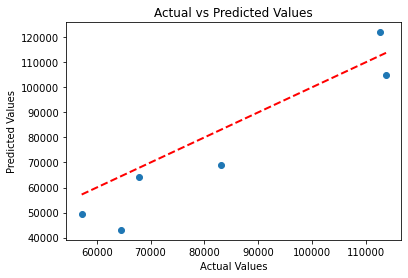

In [11]:
import matplotlib.pyplot as plt
plt.scatter(results_df['Actual'], results_df['Predicted'])
plt.plot([min(results_df['Actual']), max(results_df['Actual'])], 
         [min(results_df['Actual']), max(results_df['Actual'])], 
         linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()